# Risk Management - Problem Set 01
Authors:
- Dawid Włosek
- Julia Zezula

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Characteristic function of Gaussian distribution:
[-3.12692858e-06+2.02737800e-06j -5.72098200e-06+2.24005776e-06j
 -9.87969648e-06+1.70793794e-06j -1.61880418e-05-4.99374322e-07j
 -2.51970780e-05-5.97576134e-06j]
[-2.51970780e-05+5.97576134e-06j -1.61880418e-05+4.99374322e-07j
 -9.87969648e-06-1.70793794e-06j -5.72098200e-06-2.24005776e-06j
 -3.12692858e-06-2.02737800e-06j]

Characteristic function of the sum of independent Gaussian variables:
[ 6.76537435e-41+4.33344634e-40j -7.17370112e-39+1.48056491e-38j
 -4.99198246e-37+2.81558805e-37j -1.84626900e-35-1.71297871e-36j
 -4.26607044e-34-3.58289151e-34j]
[-4.26607044e-34+3.58289151e-34j -1.84626900e-35+1.71297871e-36j
 -4.99198246e-37-2.81558805e-37j -7.17370112e-39-1.48056491e-38j
  6.76537435e-41-4.33344634e-40j]


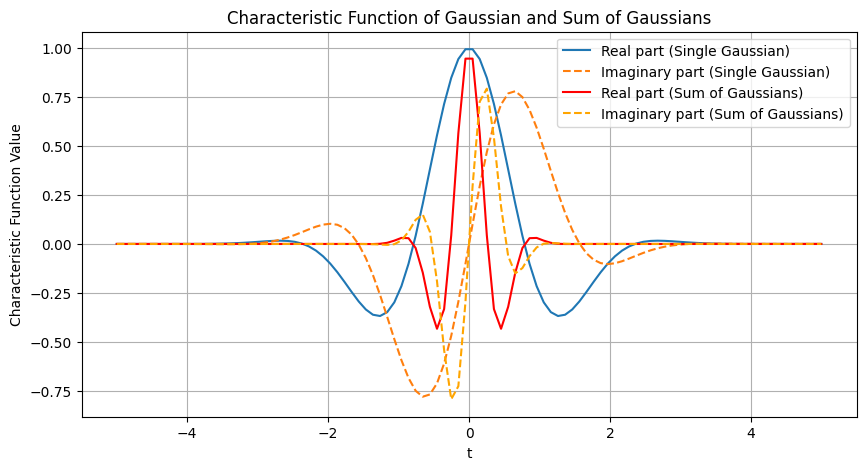

In [35]:
def gaussian_characteristic_function(t, mu, sigma):
    return np.exp(1j * mu * t - (sigma**2 * t**2) / 2)

def sum_gaussian_characteristic_function(t, mu_list, sigma_list):
    total_mu = np.sum(mu_list)
    total_sigma_squared = np.sum(np.square(sigma_list))
    return np.exp(1j * total_mu * t - (total_sigma_squared * t**2) / 2)

# Example values
t_values = np.linspace(-5, 5, 100)
mu = 2  # Mean of single Gaussian
sigma = 1  # Standard deviation of single Gaussian

# Compute characteristic function for a single Gaussian
y_single = gaussian_characteristic_function(t_values, mu, sigma)

# Example for sum of independent Gaussians
mu_list = [1, 2, 3]  # Means of Gaussian variables
sigma_list = [1, 1.5, 2]  # Standard deviations

y_sum = sum_gaussian_characteristic_function(t_values, mu_list, sigma_list)

# Print results
print("Characteristic function of Gaussian distribution:")
print(y_single[:5]) #only printing first and last elements to limit the output
print(y_single[-5:])

print("\nCharacteristic function of the sum of independent Gaussian variables:")
print(y_sum[:5])
print(y_sum[-5:])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_values, y_single.real, label="Real part (Single Gaussian)")
plt.plot(t_values, y_single.imag, label="Imaginary part (Single Gaussian)", linestyle='dashed')
plt.plot(t_values, y_sum.real, label="Real part (Sum of Gaussians)", color='red')
plt.plot(t_values, y_sum.imag, label="Imaginary part (Sum of Gaussians)", linestyle='dashed', color='orange')
plt.xlabel("t")
plt.ylabel("Characteristic Function Value")
plt.title("Characteristic Function of Gaussian and Sum of Gaussians")
plt.legend()
plt.grid()
plt.show()


The characteristic function of a Gaussian \( X \sim N(\mu, \sigma^2) \) is:
$$\varphi_X(t) = \exp\left( i \mu t - \frac{\sigma^2 t^2}{2} \right)$$

For the sum $S = X_1 + X_2 + \dots + X_n$, where $X_i \sim N(\mu_i, \sigma_i^2)$, the characteristic function is the product of individual characteristic functions:

$$\varphi_S(t) = \prod_{i=1}^{n} \varphi_{X_i}(t)$$

Expanding this, we obtain:

$$\varphi_S(t) = \exp\left( i \sum_{i=1}^{n} \mu_i t - \frac{\sum_{i=1}^{n} \sigma_i^2 t^2}{2} \right)$$

This corresponds to the characteristic function of a Gaussian distribution with mean $\sum_{i=1}^{n} \mu_i$ and variance $\sum_{i=1}^{n} \sigma_i^2$.

Thus, the sum of independent Gaussian variables is also Gaussian, demonstrating stability.


## Problem 2

The characteristic function of a probability distribution $P(x)$ is defined as:
$$\varphi(t) = E[e^{(itX)}] = \int e^{itx} P(x) dx$$
For the standard Cauchy distribution $P(x) = \frac{1}{\pi (1+x^2)}$, its characteristic function is:
$$\varphi (t) = e^{-|t|}$$


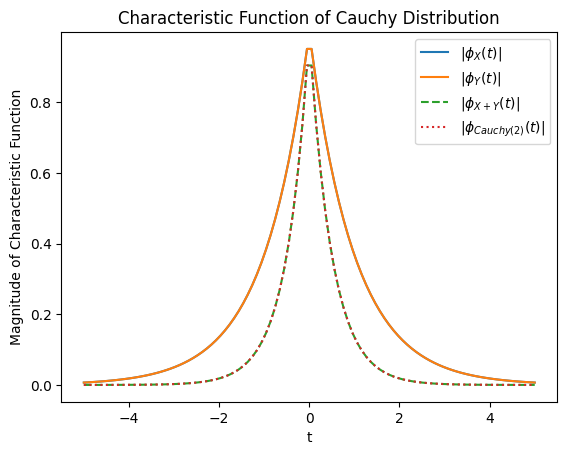

In [38]:
def cauchy_characteristic_function(t):
    return np.exp(-np.abs(t))


t_values = np.linspace(-5, 5, 100)
phi_X = cauchy_characteristic_function(t_values)
phi_Y = cauchy_characteristic_function(t_values)
phi_sum = cauchy_characteristic_function(t_values * 2)  # Scaling property of Cauchy

# Plot characteristic function
plt.plot(t_values, np.abs(phi_X), label=r"$|\phi_X(t)|$")
plt.plot(t_values, np.abs(phi_Y), label=r"$|\phi_Y(t)|$")
plt.plot(t_values, np.abs(phi_X * phi_Y), label=r"$|\phi_{X+Y}(t)|$", linestyle='dashed')
plt.plot(t_values, np.abs(phi_sum), label=r"$|\phi_{Cauchy(2)}(t)|$", linestyle='dotted')


plt.xlabel("t")
plt.ylabel("Magnitude of Characteristic Function")
plt.legend()
plt.title("Characteristic Function of Cauchy Distribution")
plt.show()


The Cauchy distribution is stable, meaning the sum of two independent standard Cauchy variables is still Cauchy,
but with a different scale parameter. The characteristic function satisfies $\varphi_{X+Y}(t) = \varphi_X(t) \cdot \varphi_Y(t)$, which holds as seen from the plots.

## Problem 3

## Problem 4

In [37]:
mu_1 = 2
sigma_1 = 0.3
mu_2 = 100
sigma_2 = 6

quantile_1 = 0.9
quantile_2 = 0.15

quantile_value_1 = np.percentile(np.random.normal(mu_1, sigma_1, 100000), quantile_1 * 100)
quantile_value_2 = np.percentile(np.random.normal(mu_2, sigma_2, 100000), quantile_2 * 100)

print(f"0.9 quantile for N({mu_1}, {sigma_1}): {quantile_value_1}")
print(f"0.15 quantile for N({mu_2}, {sigma_2}): {quantile_value_2}")

0.9 quantile for N(2, 0.3): 2.382501660683638
0.15 quantile for N(100, 6): 93.7705268452765
